<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session4/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

###In this first code I have -
* Started with max pooling befor any conv.
* Used 3X3 to reduce #channels

###Learnings - 
* Using max pool(2) before few conv. layers is causing 1/4th data to be lost before entering network.
* reducing #channels by 1X1 is giving better results(not shown in this code but tested, will use in next code)
* We are far from our desired Validation accuracy because of flaws in architecture.

###Architecture basics used -
* How many layers - reach receptive field
* Position of Max pool - should be used after 1st set of features
* 1X1 vs 3X3 for reducing #channels


In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


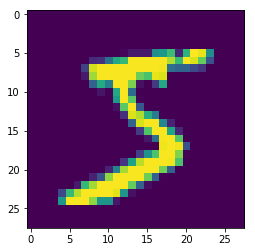

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(MaxPooling2D(pool_size=(2, 2),  input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 10)        1450      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 11,620
Trainable params: 11,620
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

model.fit(X_train, Y_train, batch_size=32, 
          epochs=10, verbose=1, 
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.2521 - acc: 0.9254 - val_loss: 0.1083 - val_acc: 0.9663
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1013 - acc: 0.9688 - val_loss: 0.0814 - val_acc: 0.9745
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0786 - acc: 0.9757 - val_loss: 0.0683 - val_acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0657 - acc: 0.9792 - val_loss: 0.0631 - val_acc: 0.9779
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0566 - acc: 0.9820 - val_loss: 0.0571 - val_acc: 0.9817
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0497 - acc: 0.9842 - val_loss: 0.0677 - val_acc: 0.9772
Epoch 7/10
60000/60000 [==============================] - 7s 114us/step - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.06048767662117025, 0.9825]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.3850119e-12 3.3077291e-15 4.1207904e-09 4.3737427e-07 1.8078154e-18
  3.6115492e-12 6.3706409e-21 9.9999952e-01 2.3344852e-11 1.1715936e-11]
 [4.7749096e-12 1.2471544e-09 1.0000000e+00 8.5231796e-12 2.6270550e-20
  6.7033436e-16 9.3908270e-10 6.7563500e-18 1.2946771e-10 3.5267302e-17]
 [2.1193284e-08 9.9986732e-01 2.7943620e-06 7.3427924e-07 1.2949853e-05
  1.6834946e-06 1.9559784e-06 5.7950379e-05 5.4435401e-05 9.5897711e-08]
 [9.9999428e-01 1.3385737e-12 3.5881076e-06 7.1482126e-10 1.4177792e-09
  3.0973200e-07 3.5976757e-07 4.3604811e-10 3.5247472e-09 1.4226572e-06]
 [8.7028847e-14 1.6565870e-17 3.8543873e-12 1.2381290e-12 9.9999976e-01
  1.5207586e-13 3.8569686e-12 4.2970204e-11 1.4872869e-07 4.5997517e-08]
 [6.2109131e-09 9.9955326e-01 9.0106909e-07 9.2960242e-08 5.0459956e-05
  2.0158288e-07 4.1953501e-07 3.2641890e-04 6.7974310e-05 2.5093425e-07]
 [1.0264370e-14 1.5220309e-09 5.0595452e-09 1.0053708e-11 9.9495882e-01
  3.0880092e-06 9.4444459e-11 2.1980428e-08 4.5502600e-03 